# Basic Examples

In [1]:
import sys
sys.path.append('../directed_persistence')

from walklength import *
from dowker_sink import *
from ph_tools import *

import networkx as nx

plt.style.use('seaborn-v0_8-deep')
plt.rcParams['axes.facecolor'] = 'white'

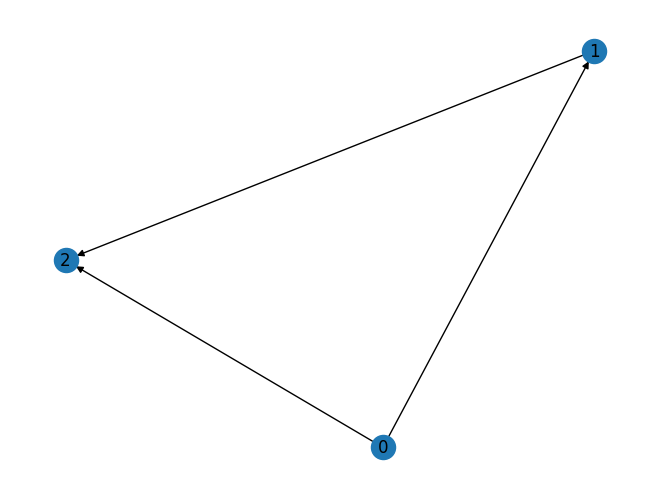

In [3]:
# Triangle

A = np.array([[0,1,1],[0,0,1],[0,0,0]])
A = A*(1 + 0.1)

nx.draw(nx.DiGraph(A), with_labels=True)

In [3]:
filt = walklength_filtration(A, max_dim=2)
dgms = persistence_dgms(filt)

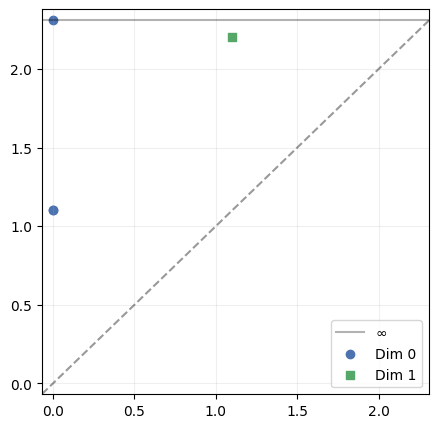

In [4]:
plt.figure(figsize=(5,5))
plot_dgms(dgms, alpha=1);

# Cycle networks

In [5]:
# Cycle graph with n vertices

n = 6

A = np.diag(np.ones(n-1),1)
A[-1,0] = 1

In [6]:
# Semicycle graph with n vertices

n = 6

A = np.diag(np.ones(n-1),1)
A[-1,0] = n
A[0,-1] = 1

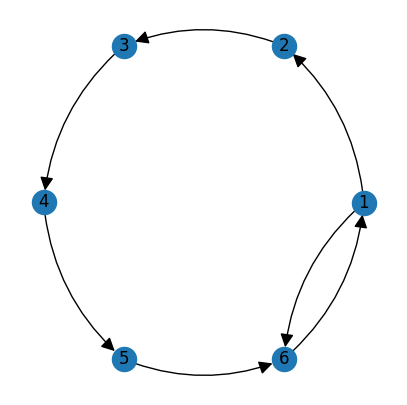

In [7]:

D = nx.DiGraph(A)

# Relabeling to start at 1
n_vert = len(D)
labels = {i:i+1 for i in D.nodes}
nx.relabel_nodes(D, labels, copy=False)

# Positioning of vertices along circle
pos = {v:[np.cos(2*np.pi*i/n_vert),np.sin(2*np.pi*i/n_vert)] for i,v in enumerate(range(1,n_vert+1))}

plt.figure(figsize = (5,5))
nx.draw_networkx_nodes(D, pos=pos)#, ax=ax2)
nx.draw_networkx_labels(D, pos=pos)#, ax=ax2)
nx.draw_networkx_edges(D, arrowsize=20, pos=pos, connectionstyle='arc3,rad=0.2')#, ax=ax2)
plt.axis('off');

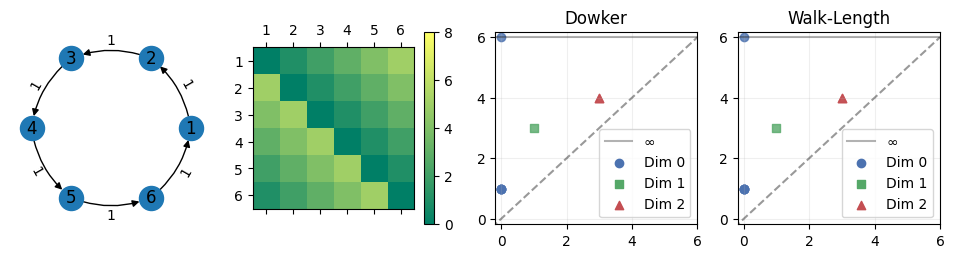

In [8]:
# Cycle graph with n vertices

n = 6

A = np.diag(np.ones(n-1),1)
A[-1,0] = 1

max_d = 2

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24*0.5,5*0.5))

### Drawing graph
D = nx.DiGraph(A)

# Relabeling to start at 1
n_vert = len(D)
labels = {i:i+1 for i in D.nodes}
nx.relabel_nodes(D, labels, copy=False)

# Positioning of vertices along circle
pos = {v:[np.cos(2*np.pi*i/n_vert),np.sin(2*np.pi*i/n_vert)] for i,v in enumerate(range(1,n_vert+1))}
nx.draw_networkx_nodes(D, pos=pos, ax=ax1)
nx.draw_networkx_labels(D, pos=pos, ax=ax1)
nx.draw_networkx_edges(D, arrowsize=10, pos=pos, ax=ax1, connectionstyle='arc3,rad=0.2')
weights = nx.get_edge_attributes(D,'weight')
weights = {e:int(w) for e,w in zip(weights.keys(),weights.values())}
nx.draw_networkx_edge_labels(D,pos,edge_labels=weights, ax=ax1, connectionstyle='arc3,rad=0.45', 
                             font_size=10, label_pos=0.5, bbox=dict(alpha=0.,) )
ax1.set_xlim([1.05*x for x in ax1.get_xlim()])
ax1.set_ylim([1.12*y for y in ax1.get_ylim()])
ax1.axis('off');

### Shortest distance matrix
B = shortest_path(A)
fig1 = ax2.matshow(B, cmap='summer', vmin=0, vmax=2*n-4)
ticks = np.array(range(len(D)))
ax2.set_xticks(ticks, ticks+1);
ax2.set_yticks(ticks, ticks+1);
cb = plt.colorbar(fig1)#, ticks=[0,0.5,1,1.5,2])
#cb.set_ticks([0,1,2])

### Persistence
ax3.set_title('Dowker')
## Added a point to add legend and emphasize there is no dimension 2
_ = plot_dgms(np.concat((persistence_dgms(dowker_sink(B, max_dim=max_d), max_dim=max_d),np.array([[2,-1,-1],]).T),axis=1), 
              ax=ax3, inf_val=6, max_dim=max_d)
ax4.set_title('Walk-Length')
## Added a point to add legend and emphasize there is no dimension 2
_ = plot_dgms(np.concat((persistence_dgms(walklength_filtration(A, max_dim=max_d), max_dim=max_d),np.array([[2,-1,-1],]).T),axis=1), 
              ax=ax4, inf_val=6, max_dim=max_d)

#plt.savefig('../figures/example_cycle_six.png', bbox_inches='tight', dpi=500);

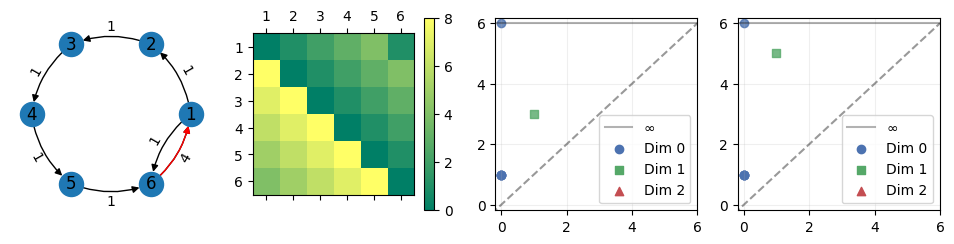

In [9]:
# Semicycle graph with n vertices

n = 6
testnum = 4

A = np.diag(np.ones(n-1),1)
A[-1,0] = testnum
A[0,-1] = 1

max_d = 2

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24*0.5,5*0.5))

### Drawing graph
D = nx.DiGraph(A)

# Relabeling to start at 1
n_vert = len(D)
labels = {i:i+1 for i in D.nodes}
nx.relabel_nodes(D, labels, copy=False)

# Positioning of vertices along circle
pos = {v:[np.cos(2*np.pi*i/n_vert),np.sin(2*np.pi*i/n_vert)] for i,v in enumerate(range(1,n_vert+1))}
nx.draw_networkx_nodes(D, pos=pos, ax=ax1)
nx.draw_networkx_labels(D, pos=pos, ax=ax1)
nx.draw_networkx_edges(D, arrowsize=10, pos=pos, ax=ax1, connectionstyle='arc3,rad=0.2')
nx.draw_networkx_edges(D, edgelist=[(n,1)], arrowsize=10, pos=pos, ax=ax1, connectionstyle='arc3,rad=0.2', edge_color='red')
weights = nx.get_edge_attributes(D,'weight')
weights = {e:int(w) for e,w in zip(weights.keys(),weights.values())}
nx.draw_networkx_edge_labels(D,pos,edge_labels=weights, ax=ax1, connectionstyle='arc3,rad=0.45', 
                             font_size=10, label_pos=0.5, bbox=dict(alpha=0.,) )
ax1.set_xlim([1.05*x for x in ax1.get_xlim()])
ax1.set_ylim([1.12*y for y in ax1.get_ylim()])
ax1.axis('off');

### Shortest distance matrix
B = shortest_path(A)
fig1 = ax2.matshow(B, cmap='summer', vmin=0, vmax=2*n-4)
ticks = np.array(range(len(D)))
ax2.set_xticks(ticks, ticks+1);
ax2.set_yticks(ticks, ticks+1);
cb = plt.colorbar(fig1)#, ticks=[0,0.5,1,1.5,2])
#cb.set_ticks([0,1,2])

### Persistence
#ax3.set_title('Dowker')
## Added a point to add legend and emphasize there is no dimension 2
_ = plot_dgms(np.concat((persistence_dgms(dowker_sink(B, max_dim=max_d), max_dim=max_d),np.array([[2,-1,-1],]).T),axis=1), 
              ax=ax3, inf_val=6, max_dim=max_d)
#ax4.set_title('Walk-Length')
## Added a point to add legend and emphasize there is no dimension 2
_ = plot_dgms(np.concat((persistence_dgms(walklength_filtration(A, max_dim=max_d), max_dim=max_d),np.array([[2,-1,-1],]).T),axis=1), 
              ax=ax4, inf_val=6, max_dim=max_d)

#plt.savefig('../figures/example_semicycle_six.png', bbox_inches='tight', dpi=500);